# **Covid Prediction** **Model** 

# **Reading Dataset**

Importing libraries

In [1]:
#import dependencies 
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

import plotly
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import cufflinks as cf
from sklearn.linear_model import LinearRegression
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


pyo.init_notebook_mode(connected=True)
cf.go_offline()
from plotly.offline import init_notebook_mode,plot,iplot
plotly.io.renderers.default = 'colab'
poly_reg = PolynomialFeatures(degree=7)
poly_reg3 = PolynomialFeatures(degree=3)

plotly.io.renderers.default = "vscode"

loading dataset

In [2]:
#reading the dataset using pandas library
df = pd.read_csv('state_wise_daily.csv',parse_dates=['Date','Date_YMD'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '14-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '15-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '16-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '17-03-2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning:

Parsing '18-03-2020' in DD/MM/YYYY format. Pro

In [3]:
#This head method prints the first 10 data rows from the dataset 
df.tail()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
2218,2022-03-23,2022-03-23,Recovered,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2219,2022-03-23,2022-03-23,Deceased,67.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2220,2022-03-24,2022-03-24,Confirmed,1685.0,0,39,0,0,0,0,...,0,0,0,41,49,0,0,0,59,0
2221,2022-03-24,2022-03-24,Recovered,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2222,2022-03-24,2022-03-24,Deceased,83.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.metrics


class TuningModel:

    def __init__(self):
        pass

    def my_polynomial_regression(self, poly_degree, X, y, test_size=0.15):
    
        poly_features= PolynomialFeatures(degree=poly_degree)
        
        # transforms the existing features to higher degree features.
        X_poly = pd.DataFrame(poly_features.fit_transform(X))   
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
        y_poly_train =  poly_features.fit_transform(y_train)

        y_poly_test =  poly_features.fit_transform(y_test)
        # fit the transformed features to Linear Regression
        poly_model = LinearRegression()
        poly_model.fit(y_poly_train, X_train)
        
    
        # predicting on training data-set
        y_train_predicted = poly_model.predict(y_poly_train)
    
        # predicting on test data-set
        y_test_predicted = poly_model.predict(y_poly_test)
        # evaluating the model on training dataset
        MSE_train = round(np.mean(np.square(X_train - y_train_predicted)),2)
        RMSE_train = round(np.sqrt(MSE_train),2)

    
        # evaluating the model on test dataset
        MSE_test = round(np.mean(np.square(X_test - y_test_predicted)),2)
        RMSE_test = round(np.sqrt(MSE_test),2)

        return poly_degree, RMSE_train, RMSE_test

    def finalDegree(self, x, y):

        returns= []
        for i in range(1,50):
            returns.append(self.my_polynomial_regression(poly_degree=i,X=x,y=y))
            
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
        output = pd.DataFrame(returns, columns=['Degree', 'RMSE_train', 'RMSE_test'])
        model = LinearRegression()
        NMSE = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )
        NMSE
        MSE_CV= np.mean(-NMSE)
        MSE_CV
        RMSE_CV=[]
        iterator= range(1,50) # the second number is polynomial degree 
        for i in iterator:
            X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(degree=i).fit_transform(X), y, test_size=0.3, shuffle=False)
            MSE = -cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )
            RMSE_CV.append(np.sqrt(MSE).mean())
            
        output = pd.DataFrame(list(iterator), columns=['Poly degree'])
        output['RMSE_CV']=RMSE_CV

        val = output['RMSE_CV'].min()
        final = output.loc[output['RMSE_CV'] == val]
        return final



# Delhi State prophet model

In [5]:
# below we are extracting the data only which is required 
# we are taking date and status columns from the dataset
pivot = pd.pivot_table(df,values='DL',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

In [6]:
#we are converting the data into a dataframe 
#using pandas library
finalData = pd.DataFrame(pivot)

In [7]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [8]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.head()

Status,Date,Confirmed,Deceased,Recovered
0,2020-03-14,7.0,1.0,1.0
1,2020-03-15,0.0,0.0,1.0
2,2020-03-16,0.0,0.0,0.0
3,2020-03-17,1.0,0.0,0.0
4,2020-03-18,2.0,0.0,0.0


In [9]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

In [10]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]

In [11]:
#Confirmed cases data
Confirmed.tail()

Status,Date,Confirmed
736,2022-03-20,97.0
737,2022-03-21,108.0
738,2022-03-22,104.0
739,2022-03-23,132.0
740,2022-03-24,111.0


In [12]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

In [13]:
#Confirmed cases data
Confirmed.tail()

,ds,y
736,2022-03-20,97.0
737,2022-03-21,108.0
738,2022-03-22,104.0
739,2022-03-23,132.0
740,2022-03-24,111.0


In [14]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [15]:
#Fitting the model with data
m.fit(Confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [16]:
future = m.make_future_dataframe(periods=100)
future.tail(10)
dtts = future.tail(10)

In [17]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_upper,yhat_lower
831,2022-06-23,6814.318898,14912.111663,-739.004960
832,2022-06-24,7359.396770,15231.139680,-845.052772
833,2022-06-25,7012.121432,14186.912612,-705.886066
834,2022-06-26,6837.562868,14424.455881,-1442.201200
835,2022-06-27,6332.114507,14408.553158,-1174.698377
836,2022-06-28,6532.922944,14818.591451,-1188.217843
837,2022-06-29,7147.474153,14816.363921,-149.294432
838,2022-06-30,6617.355005,14465.927136,-1338.852019
839,2022-07-01,7223.788215,15458.498711,-385.074003
840,2022-07-02,6938.040146,14640.161904,-1824.460002


In [18]:
#This is the first 5 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,-883.349921,-14801.519189,744.718317,-883.349921,-883.349921,-6020.714321,-6020.714321,-6020.714321,-3564.963618,...,129.603428,129.603428,129.603428,-2585.354132,-2585.354132,-2585.354132,0.0,0.0,0.0,-6904.064242
1,2020-03-15,-840.404626,-14354.769750,1221.325352,-840.404626,-840.404626,-5987.795401,-5987.795401,-5987.795401,-3564.963618,...,-6.771606,-6.771606,-6.771606,-2416.060176,-2416.060176,-2416.060176,0.0,0.0,0.0,-6828.200026
2,2020-03-16,-797.459331,-14985.233621,760.150228,-797.459331,-797.459331,-6283.912981,-6283.912981,-6283.912981,-3564.963618,...,-483.220063,-483.220063,-483.220063,-2235.729301,-2235.729301,-2235.729301,0.0,0.0,0.0,-7081.372312
3,2020-03-17,-754.514036,-14167.989003,1248.195970,-754.514036,-754.514036,-5873.170002,-5873.170002,-5873.170002,-3564.963618,...,-263.027469,-263.027469,-263.027469,-2045.178915,-2045.178915,-2045.178915,0.0,0.0,0.0,-6627.684038
4,2020-03-18,-711.568741,-13377.777313,2455.292574,-711.568741,-711.568741,-5048.869490,-5048.869490,-5048.869490,-3564.963618,...,361.292855,361.292855,361.292855,-1845.198727,-1845.198727,-1845.198727,0.0,0.0,0.0,-5760.438231


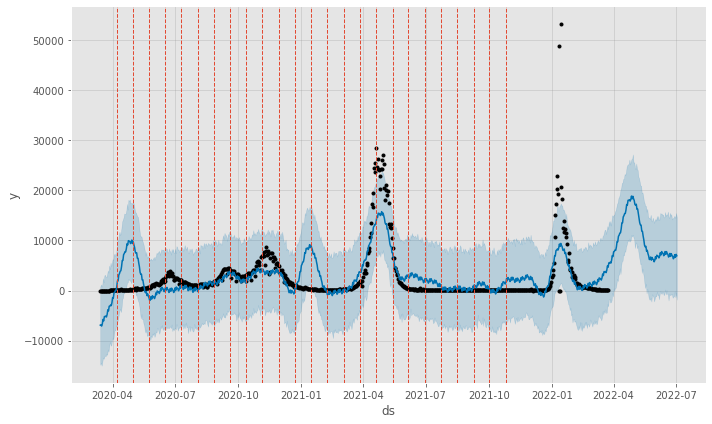

In [19]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [20]:
pickle.dump(m, open('dl_model', 'wb'))

# **Prophet Training Models**

In [21]:
# below we are extracting the data only which is required 
# we are taking date and status columns from the dataset
pivot = pd.pivot_table(df,values='TT',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

In [22]:

finalData = pd.DataFrame(pivot)

In [23]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [24]:

finalData.head()

Status,Date,Confirmed,Deceased,Recovered
0,2020-03-14,81.0,2.0,9.0
1,2020-03-15,27.0,0.0,4.0
2,2020-03-16,15.0,0.0,1.0
3,2020-03-17,11.0,1.0,1.0
4,2020-03-18,37.0,0.0,0.0


In [25]:

finalData.iplot(kind='scatter',x='Date',y=['Confirmed'],xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

In [26]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]

In [27]:

Confirmed.tail()

Status,Date,Confirmed
736,2022-03-20,1549.0
737,2022-03-21,1581.0
738,2022-03-22,1778.0
739,2022-03-23,1938.0
740,2022-03-24,1685.0


In [28]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

In [29]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [30]:
#Fitting the model with data
m.fit(Confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [31]:
# We are making the future dates for predictions
future = m.make_future_dataframe(periods=100)
future.tail(10)
dtts = future.tail(10)

In [32]:

forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_upper,yhat_lower
831,2022-06-23,128328.057042,239253.305461,27404.596502
832,2022-06-24,127286.529981,230634.850150,33584.923338
833,2022-06-25,126292.818224,228946.080773,21734.708440
834,2022-06-26,122323.282033,226334.627652,19469.793890
835,2022-06-27,113467.339244,220405.479604,13939.780275
836,2022-06-28,118837.004980,228386.737977,19631.501600
837,2022-06-29,121961.391517,227013.386059,24657.557813
838,2022-06-30,120481.890191,224656.848770,14244.432642
839,2022-07-01,120292.538815,223601.708941,13210.941652
840,2022-07-02,120263.330666,219817.750461,17331.949607


In [33]:

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,-17569.484324,-227138.734963,-25354.703674,-17569.484324,-17569.484324,-113362.502663,-113362.502663,-113362.502663,-70726.645877,...,2597.051940,2597.051940,2597.051940,-45232.908726,-45232.908726,-45232.908726,0.0,0.0,0.0,-130931.986987
1,2020-03-15,-16842.099479,-230165.527610,-29714.704089,-16842.099479,-16842.099479,-112088.834925,-112088.834925,-112088.834925,-70726.645877,...,-107.815384,-107.815384,-107.815384,-41254.373665,-41254.373665,-41254.373665,0.0,0.0,0.0,-128930.934404
2,2020-03-16,-16114.714634,-236359.974218,-31852.742592,-16114.714634,-16114.714634,-115662.398985,-115662.398985,-115662.398985,-70726.645877,...,-7805.268564,-7805.268564,-7805.268564,-37130.484544,-37130.484544,-37130.484544,0.0,0.0,0.0,-131777.113619
3,2020-03-17,-15387.329790,-217743.352732,-25916.693556,-15387.329790,-15387.329790,-105000.421063,-105000.421063,-105000.421063,-70726.645877,...,-1402.454898,-1402.454898,-1402.454898,-32871.320289,-32871.320289,-32871.320289,0.0,0.0,0.0,-120387.750852
4,2020-03-18,-14659.944945,-218981.821840,-9476.712158,-14659.944945,-14659.944945,-96602.933904,-96602.933904,-96602.933904,-70726.645877,...,2612.411481,2612.411481,2612.411481,-28488.699509,-28488.699509,-28488.699509,0.0,0.0,0.0,-111262.878849


In [34]:
pickle.dump(m, open('india_model', 'wb'))

***We are using fbprophet model for predicting future cases***

## **West Bebgal State**

In [35]:
# below we are extracting the data only which is required 
# we are taking date and status columns from the dataset
pivot = pd.pivot_table(df,values='WB',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

In [36]:

finalData = pd.DataFrame(pivot)

In [37]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [38]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.tail()

Status,Date,Confirmed,Deceased,Recovered
736,2022-03-20,45.0,0.0,0.0
737,2022-03-21,27.0,1.0,0.0
738,2022-03-22,75.0,2.0,0.0
739,2022-03-23,59.0,0.0,0.0
740,2022-03-24,59.0,0.0,0.0


In [39]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

In [40]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]

In [41]:
#Confirmed cases data
Confirmed.tail()

Status,Date,Confirmed
736,2022-03-20,45.0
737,2022-03-21,27.0
738,2022-03-22,75.0
739,2022-03-23,59.0
740,2022-03-24,59.0


In [42]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

In [43]:
#Confirmed cases data
Confirmed.tail()

,ds,y
736,2022-03-20,45.0
737,2022-03-21,27.0
738,2022-03-22,75.0
739,2022-03-23,59.0
740,2022-03-24,59.0


In [44]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [45]:
#Fitting the model with data
m.fit(Confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [46]:
future = m.make_future_dataframe(periods=100)
future.tail(10)
dtts = future.tail(10)

In [47]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_upper,yhat_lower
831,2022-06-23,6399.665511,13386.028281,-572.168507
832,2022-06-24,6838.977008,13601.593981,77.131441
833,2022-06-25,6594.578737,13216.410539,-432.113503
834,2022-06-26,6573.482170,13271.435434,38.319851
835,2022-06-27,6271.859356,12752.348193,-535.281157
836,2022-06-28,6189.702436,12876.415503,-847.079047
837,2022-06-29,6725.238982,13633.383644,-173.229294
838,2022-06-30,6342.068307,13612.124399,-529.341927
839,2022-07-01,6876.782817,14170.176195,216.332986
840,2022-07-02,6719.334998,13587.972142,-66.852565


In [48]:
#This is the first 5 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,-654.164669,-13739.063957,-361.149607,-654.164669,-654.164669,-6005.187201,-6005.187201,-6005.187201,-2618.17806,...,89.913528,89.913528,89.913528,-3476.922669,-3476.922669,-3476.922669,0.0,0.0,0.0,-6659.351870
1,2020-03-15,-634.856779,-13082.646442,78.167972,-634.856779,-634.856779,-5802.279263,-5802.279263,-5802.279263,-2618.17806,...,90.070434,90.070434,90.070434,-3274.171637,-3274.171637,-3274.171637,0.0,0.0,0.0,-6437.136042
2,2020-03-16,-615.548889,-13530.777605,103.076712,-615.548889,-615.548889,-5879.033985,-5879.033985,-5879.033985,-2618.17806,...,-205.385643,-205.385643,-205.385643,-3055.470282,-3055.470282,-3055.470282,0.0,0.0,0.0,-6494.582874
3,2020-03-17,-596.240999,-12842.085511,830.414777,-596.240999,-596.240999,-5737.128964,-5737.128964,-5737.128964,-2618.17806,...,-295.424148,-295.424148,-295.424148,-2823.526756,-2823.526756,-2823.526756,0.0,0.0,0.0,-6333.369963
4,2020-03-18,-576.933109,-11789.316317,1243.132715,-576.933109,-576.933109,-4980.067719,-4980.067719,-4980.067719,-2618.17806,...,219.433948,219.433948,219.433948,-2581.323607,-2581.323607,-2581.323607,0.0,0.0,0.0,-5557.000828


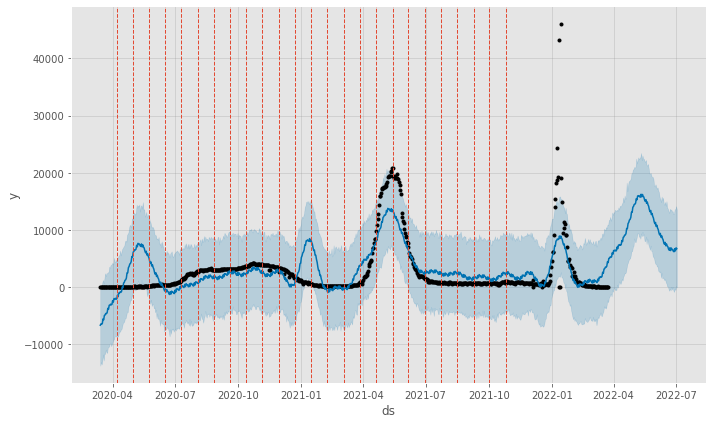

In [49]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [50]:
pickle.dump(m, open('wb_model', 'wb'))

## **Telangana State**

In [51]:
# below we are extracting the data only which is required 
# we are taking date and status columns from the dataset
pivot = pd.pivot_table(df,values='TG',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

In [52]:
#we are converting the data into a dataframe 
#using pandas library
finalData = pd.DataFrame(pivot)

In [53]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [54]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.tail()

Status,Date,Confirmed,Deceased,Recovered
736,2022-03-20,35.0,0.0,0.0
737,2022-03-21,73.0,0.0,0.0
738,2022-03-22,53.0,0.0,0.0
739,2022-03-23,72.0,0.0,0.0
740,2022-03-24,49.0,0.0,0.0


In [55]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

In [56]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]

In [57]:
#Confirmed cases data
Confirmed.tail()

Status,Date,Confirmed
736,2022-03-20,35.0
737,2022-03-21,73.0
738,2022-03-22,53.0
739,2022-03-23,72.0
740,2022-03-24,49.0


In [58]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

In [59]:
#Confirmed cases data
Confirmed.tail()

,ds,y
736,2022-03-20,35.0
737,2022-03-21,73.0
738,2022-03-22,53.0
739,2022-03-23,72.0
740,2022-03-24,49.0


In [60]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [61]:
#Fitting the model with data
m.fit(Confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [62]:
future = m.make_future_dataframe(periods=100)
future.tail(10)
dtts = future.tail(10)

In [63]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_upper,yhat_lower
831,2022-06-23,3354.266642,5271.139734,1390.336675
832,2022-06-24,3466.907624,5365.171470,1466.261613
833,2022-06-25,3370.063473,5342.832176,1477.089876
834,2022-06-26,3278.218428,5290.694211,1407.246860
835,2022-06-27,3181.062433,5069.111581,1231.100274
836,2022-06-28,3378.454610,5357.494122,1411.496342
837,2022-06-29,3431.849128,5335.867882,1493.505620
838,2022-06-30,3386.746514,5270.544968,1533.008354
839,2022-07-01,3520.450469,5529.733461,1532.867259
840,2022-07-02,3444.579209,5358.500416,1580.031988


In [64]:
#This is the first 5 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,-277.229860,-4161.013930,-677.576190,-277.229860,-277.229860,-2133.734913,-2133.734913,-2133.734913,-1114.542217,...,26.024172,26.024172,26.024172,-1045.216868,-1045.216868,-1045.216868,0.0,0.0,0.0,-2410.964774
1,2020-03-15,-266.519128,-4235.199639,-643.134564,-266.519128,-266.519128,-2160.353406,-2160.353406,-2160.353406,-1114.542217,...,-67.201029,-67.201029,-67.201029,-978.610160,-978.610160,-978.610160,0.0,0.0,0.0,-2426.872534
2,2020-03-16,-255.808395,-4277.004149,-601.290501,-255.808395,-255.808395,-2195.967142,-2195.967142,-2195.967142,-1114.542217,...,-168.842843,-168.842843,-168.842843,-912.582082,-912.582082,-912.582082,0.0,0.0,0.0,-2451.775537
3,2020-03-17,-245.097663,-4120.629058,-407.113698,-245.097663,-245.097663,-1941.017376,-1941.017376,-1941.017376,-1114.542217,...,20.878666,20.878666,20.878666,-847.353825,-847.353825,-847.353825,0.0,0.0,0.0,-2186.115039
4,2020-03-18,-234.386930,-3914.219991,-227.593623,-234.386930,-234.386930,-1834.175585,-1834.175585,-1834.175585,-1114.542217,...,63.427835,63.427835,63.427835,-783.061203,-783.061203,-783.061203,0.0,0.0,0.0,-2068.562515


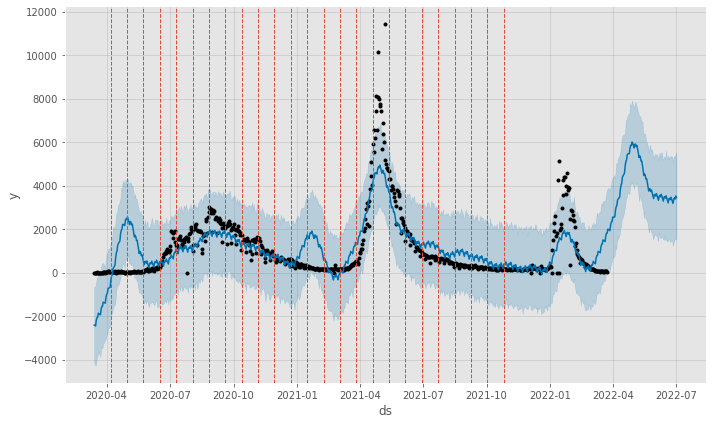

In [65]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [66]:
pickle.dump(m, open('tg_model', 'wb'))

## **AP State**

In [67]:
# below we are extracting the data only which is required 
# we are taking date and status columns from the dataset
pivot = pd.pivot_table(df,values='AP',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

In [68]:
#we are converting the data into a dataframe 
#using pandas library
finalData = pd.DataFrame(pivot)

In [69]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [70]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.tail()

Status,Date,Confirmed,Deceased,Recovered
736,2022-03-20,49.0,0.0,0.0
737,2022-03-21,37.0,0.0,0.0
738,2022-03-22,30.0,0.0,0.0
739,2022-03-23,31.0,0.0,0.0
740,2022-03-24,39.0,0.0,0.0


In [71]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

In [72]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]

In [73]:
#Confirmed cases data
Confirmed.tail()

Status,Date,Confirmed
736,2022-03-20,49.0
737,2022-03-21,37.0
738,2022-03-22,30.0
739,2022-03-23,31.0
740,2022-03-24,39.0


In [74]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

In [75]:
#Confirmed cases data
Confirmed.tail()

,ds,y
736,2022-03-20,49.0
737,2022-03-21,37.0
738,2022-03-22,30.0
739,2022-03-23,31.0
740,2022-03-24,39.0


In [76]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [77]:
#Fitting the model with data
m.fit(Confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [78]:
future = m.make_future_dataframe(periods=100)
future.tail(10)
dtts = future.tail(10)

In [79]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_upper,yhat_lower
831,2022-06-23,8088.527643,14374.818755,2163.304586
832,2022-06-24,8012.390791,13954.767408,1615.484324
833,2022-06-25,7907.928990,14458.747540,1938.110757
834,2022-06-26,7814.798868,14121.961710,1476.036785
835,2022-06-27,6872.496723,13188.050769,566.213266
836,2022-06-28,7323.173760,13216.972985,591.320597
837,2022-06-29,7511.803095,13540.946794,1372.524976
838,2022-06-30,7367.782892,13425.030335,1284.467586
839,2022-07-01,7307.643710,13492.538003,929.575328
840,2022-07-02,7234.345192,13272.843501,891.251966


In [80]:
#This is the first 5 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,-761.540663,-12650.040442,-873.126900,-761.540663,-761.540663,-5930.279863,-5930.279863,-5930.279863,-3056.174419,...,153.608907,153.608907,153.608907,-3027.714350,-3027.714350,-3027.714350,0.0,0.0,0.0,-6691.820526
1,2020-03-15,-721.840827,-13038.256192,-645.128954,-721.840827,-721.840827,-5759.351932,-5759.351932,-5759.351932,-3056.174419,...,167.295913,167.295913,167.295913,-2870.473426,-2870.473426,-2870.473426,0.0,0.0,0.0,-6481.192760
2,2020-03-16,-682.140992,-12993.576441,-601.222270,-682.140992,-682.140992,-6435.326252,-6435.326252,-6435.326252,-3056.174419,...,-667.942537,-667.942537,-667.942537,-2711.209296,-2711.209296,-2711.209296,0.0,0.0,0.0,-7117.467244
3,2020-03-17,-642.441156,-12128.187604,-98.895840,-642.441156,-642.441156,-5717.999678,-5717.999678,-5717.999678,-3056.174419,...,-112.038434,-112.038434,-112.038434,-2549.786825,-2549.786825,-2549.786825,0.0,0.0,0.0,-6360.440835
4,2020-03-18,-602.741321,-12148.873936,40.572794,-602.741321,-602.741321,-5264.662054,-5264.662054,-5264.662054,-3056.174419,...,177.670388,177.670388,177.670388,-2386.158022,-2386.158022,-2386.158022,0.0,0.0,0.0,-5867.403375


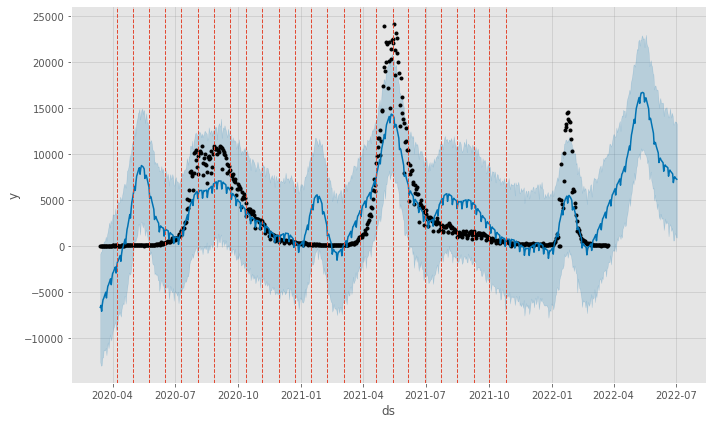

In [81]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [82]:
pickle.dump(m, open('ap_model', 'wb'))

## **Kerala State**

In [83]:
# below we are extracting the data only which is required 
# we are taking date and status columns from the dataset
pivot = pd.pivot_table(df,values='KL',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

In [84]:
#we are converting the data into a dataframe 
#using pandas library
finalData = pd.DataFrame(pivot)

In [85]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [86]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.tail()

Status,Date,Confirmed,Deceased,Recovered
736,2022-03-20,596.0,24.0,0.0
737,2022-03-21,495.0,24.0,0.0
738,2022-03-22,702.0,52.0,0.0
739,2022-03-23,702.0,61.0,0.0
740,2022-03-24,558.0,74.0,0.0


In [87]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

In [88]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]

In [89]:
#Confirmed cases data
Confirmed.tail()

Status,Date,Confirmed
736,2022-03-20,596.0
737,2022-03-21,495.0
738,2022-03-22,702.0
739,2022-03-23,702.0
740,2022-03-24,558.0


In [90]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

In [91]:
#Confirmed cases data
Confirmed.tail()

,ds,y
736,2022-03-20,596.0
737,2022-03-21,495.0
738,2022-03-22,702.0
739,2022-03-23,702.0
740,2022-03-24,558.0


In [92]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [93]:
#Fitting the model with data
m.fit(Confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [94]:
future = m.make_future_dataframe(periods=100)
future.tail(10)
dtts = future.tail(10)

In [95]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_upper,yhat_lower
831,2022-06-23,14394.849963,26509.542073,2622.805545
832,2022-06-24,14316.530760,26450.197504,1118.541111
833,2022-06-25,14116.944255,27532.226010,1177.096137
834,2022-06-26,13393.702924,25171.658608,1573.271303
835,2022-06-27,10926.009663,23444.164367,-1537.854677
836,2022-06-28,13629.221801,24355.546464,1250.988076
837,2022-06-29,14400.615387,27732.397949,2294.359084
838,2022-06-30,13586.133782,25908.598456,713.250158
839,2022-07-01,13536.398745,25597.412818,824.091177
840,2022-07-02,13389.382021,25957.298150,1188.210472


In [96]:
#This is the first 5 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,-593.200591,-22251.265797,2122.733819,-593.200591,-593.200591,-9673.971834,-9673.971834,-9673.971834,-2449.372685,...,398.305950,398.305950,398.305950,-7622.905100,-7622.905100,-7622.905100,0.0,0.0,0.0,-10267.172425
1,2020-03-15,-576.287885,-22666.012502,734.973225,-576.287885,-576.287885,-10028.671025,-10028.671025,-10028.671025,-2449.372685,...,-202.407479,-202.407479,-202.407479,-7376.890862,-7376.890862,-7376.890862,0.0,0.0,0.0,-10604.958911
2,2020-03-16,-559.375179,-26121.540735,570.155144,-559.375179,-559.375179,-12148.433984,-12148.433984,-12148.433984,-2449.372685,...,-2547.769530,-2547.769530,-2547.769530,-7151.291770,-7151.291770,-7151.291770,0.0,0.0,0.0,-12707.809163
3,2020-03-17,-542.462473,-21251.724208,3210.582781,-542.462473,-542.462473,-9120.782641,-9120.782641,-9120.782641,-2449.372685,...,274.117159,274.117159,274.117159,-6945.527116,-6945.527116,-6945.527116,0.0,0.0,0.0,-9663.245114
4,2020-03-18,-525.549767,-21136.088439,3616.329289,-525.549767,-525.549767,-8050.802868,-8050.802868,-8050.802868,-2449.372685,...,1156.851823,1156.851823,1156.851823,-6758.282007,-6758.282007,-6758.282007,0.0,0.0,0.0,-8576.352635


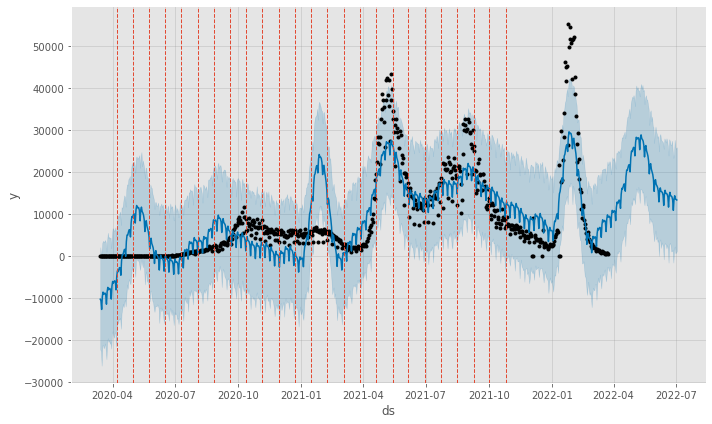

In [97]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [98]:
pickle.dump(m, open('kl_model', 'wb'))

## **Karnataka State**

In [99]:
# below we are extracting the data only which is required 
# we are taking date and status columns from the dataset
pivot = pd.pivot_table(df,values='KA',index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features

In [100]:
#we are converting the data into a dataframe 
#using pandas library
finalData = pd.DataFrame(pivot)

In [101]:
#Resetting the indexes of the data which is extracted 
finalData.reset_index(inplace=True)

In [102]:
#This will print the first five data rows of the dataframe which we are going to use
#for our predictions.
finalData.tail()

Status,Date,Confirmed,Deceased,Recovered
736,2022-03-20,109.0,3.0,0.0
737,2022-03-21,71.0,2.0,0.0
738,2022-03-22,92.0,2.0,0.0
739,2022-03-23,93.0,1.0,0.0
740,2022-03-24,109.0,2.0,0.0


In [103]:
#Plotting the graph of the confirmed cases of west bengal state from the dataset
#With respect to the date 
finalData.iplot(kind='scatter',x='Date',y='Confirmed',xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization

In [104]:
#we are seperating the data with respect to their status.
Confirmed = finalData[['Date','Confirmed']]
Recovered = finalData[['Date','Recovered']]
Deceased = finalData[['Date','Deceased']]

In [105]:
#Confirmed cases data
Confirmed.tail()

Status,Date,Confirmed
736,2022-03-20,109.0
737,2022-03-21,71.0
738,2022-03-22,92.0
739,2022-03-23,93.0
740,2022-03-24,109.0


In [106]:
#AS the fbprophet model takes inuput columns of date as ds and confirmed or recovered or deceased cases ad y
Confirmed.columns = ['ds','y']
Recovered.columns = ['ds','y']
Deceased.columns = ['ds','y']

In [107]:
#Confirmed cases data
Confirmed.tail()

,ds,y
736,2022-03-20,109.0
737,2022-03-21,71.0
738,2022-03-22,92.0
739,2022-03-23,93.0
740,2022-03-24,109.0


In [108]:
#Initializing the model
#fbprophet model is the time series forecasting model which helps us to make predictions 
#based on the previous data
# This model also provides us the weakly, yearly, monthly trends also
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True,weekly_seasonality=True)

In [109]:
#Fitting the model with data
m.fit(Confirmed)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [110]:
future = m.make_future_dataframe(periods=100)
future.tail(10)
dtts = future.tail(10)

In [111]:
#forecasting with model
#predicting the cases for the future 10 days 
# ds = dates
#yhat = predicted outputs
# yhat_upper = upper limit the prediction values
#yhat_lower = lower limit of the prediction values
forecast = m.predict(future)
forecast[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_upper,yhat_lower
831,2022-06-23,14139.381626,27373.061031,206.982733
832,2022-06-24,13715.990002,27582.402761,-1167.785569
833,2022-06-25,13927.879732,27488.552577,810.141937
834,2022-06-26,13222.596970,27414.436277,-369.020405
835,2022-06-27,12608.010336,26642.626414,-1263.960241
836,2022-06-28,12368.809013,25873.492917,-1861.870980
837,2022-06-29,12546.730376,26224.635362,-648.290393
838,2022-06-30,12641.741734,26249.076642,-330.474395
839,2022-07-01,12309.422471,26467.321044,-806.507974
840,2022-07-02,12640.552374,26291.893551,-1247.776695


In [112]:
#This is the first 5 rows of the we are predicted
# it shows weakly trends , monthly, yearly trends.
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-03-14,-1721.081234,-26900.694024,257.670307,-1721.081234,-1721.081234,-10985.768289,-10985.768289,-10985.768289,-6920.918895,...,495.584368,495.584368,495.584368,-4560.433762,-4560.433762,-4560.433762,0.0,0.0,0.0,-12706.849522
1,2020-03-15,-1644.519764,-26637.443987,329.644307,-1644.519764,-1644.519764,-11139.898044,-11139.898044,-11139.898044,-6920.918895,...,21.734107,21.734107,21.734107,-4240.713256,-4240.713256,-4240.713256,0.0,0.0,0.0,-12784.417808
2,2020-03-16,-1567.958294,-27404.677485,-138.997535,-1567.958294,-1567.958294,-11209.563950,-11209.563950,-11209.563950,-6920.918895,...,-370.204287,-370.204287,-370.204287,-3918.440768,-3918.440768,-3918.440768,0.0,0.0,0.0,-12777.522244
3,2020-03-17,-1491.396824,-26951.968538,486.411444,-1491.396824,-1491.396824,-10913.649394,-10913.649394,-10913.649394,-6920.918895,...,-399.969900,-399.969900,-399.969900,-3592.760598,-3592.760598,-3592.760598,0.0,0.0,0.0,-12405.046218
4,2020-03-18,-1414.835355,-25235.923951,2311.035650,-1414.835355,-1414.835355,-10214.092629,-10214.092629,-10214.092629,-6920.918895,...,-30.150135,-30.150135,-30.150135,-3263.023598,-3263.023598,-3263.023598,0.0,0.0,0.0,-11628.927984


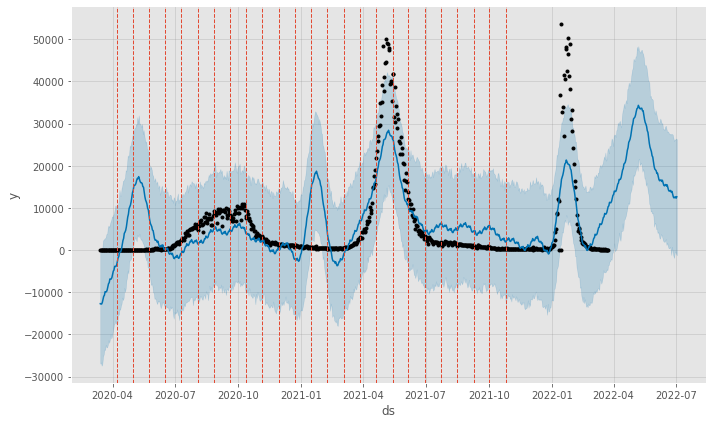

In [113]:
#forecast plot 
#below we are ploting the predicted values vs the trained data
# blue color line is the hypothesis line created by the model
# Black color line is the data from the dataset we used 
confirmed_forecast_plot = m.plot(forecast)
confirmed_forecast_plot
for changepoint in m.changepoints:
    plt.axvline(changepoint,ls='--', lw=1)

In [114]:
pickle.dump(m, open('ka_model', 'wb'))

# **Linear Regression IN**

In [115]:
std=pd.read_csv('state_wise_daily.csv')

In [116]:
std.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,...,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,14-03-2020,Confirmed,81.0,0,1,0,0,0,0,...,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,14-03-2020,Recovered,9.0,0,0,0,0,0,0,...,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,14-03-2020,Deceased,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,15-03-2020,Confirmed,27.0,0,0,0,0,0,0,...,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,15-03-2020,Recovered,4.0,0,0,0,0,0,0,...,0,2,0,0,1,0,0,0,0,0


In [117]:
std['Confirmed']=std['TT']

In [118]:
std=std[std.Status=='Confirmed']

In [119]:
std=std.drop(columns='Status', axis=1)

In [120]:
columns=['Date','Date_YMD', 'Confirmed']

In [121]:
std=std[columns]

In [122]:
std.tail()

,Date,Date_YMD,Confirmed
2208,20-Mar-22,03-20-2022,1549.0
2211,21-Mar-22,03-21-2022,1581.0
2214,22-Mar-22,03-22-2022,1778.0
2217,23-Mar-22,03-23-2022,1938.0
2220,24-Mar-22,03-24-2022,1685.0


In [123]:
std['Date']=pd.to_datetime(std['Date'])
std['Date']=std['Date'].map(dt.datetime.toordinal)

In [124]:
std.tail()

,Date,Date_YMD,Confirmed
2208,738234,03-20-2022,1549.0
2211,738235,03-21-2022,1581.0
2214,738236,03-22-2022,1778.0
2217,738237,03-23-2022,1938.0
2220,738238,03-24-2022,1685.0


In [125]:
X = std.iloc[:, :-2].values   # Date
Y = std.iloc[:, 2].values     # Confirmed cases

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0) 

regsr = LinearRegression()  
regsr.fit(X_train.reshape(-1,1), Y_train) 

LinearRegression()

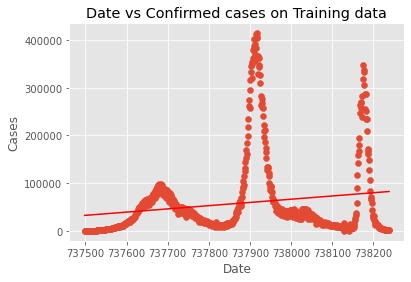

In [127]:
# Plotting the regression line
regline = regsr.coef_*X+regsr.intercept_

# Plotting on the training dataset
plt.scatter(X, Y)
plt.plot(X, regline, color='red')
plt.title('Date vs Confirmed cases on Training data')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

In [128]:
Y_pred = regsr.predict(X_test)


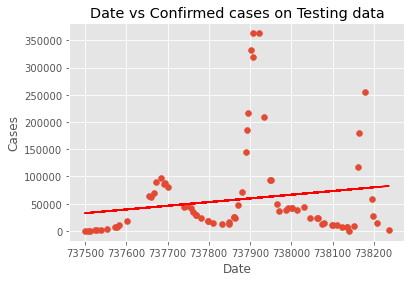

In [129]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.title('Date vs Confirmed cases on Testing data')  
plt.xlabel('Date')  
plt.ylabel('Cases')   
plt.show()

In [130]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 57633.70646480898
Mean Squared Error: 7251702591.875911
Root Mean Squared Error: 85156.92920647099
R-2: 0.012350091371026384


In [131]:

pickle.dump(regsr, open('linearModel_in', 'wb'))

# **Linear Regression WB**

In [132]:
std=pd.read_csv('state_wise_daily.csv')

In [133]:
std['Confirmed']=std['WB']

In [134]:
std=std[std.Status=='Confirmed']

In [135]:
std=std.drop(columns='Status', axis=1)

In [136]:
columns=['Date','Date_YMD', 'Confirmed']

In [137]:
std=std[columns]

In [138]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,0
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,0
9,17-Mar-20,17-03-2020,1
12,18-Mar-20,18-03-2020,0


In [139]:
std['Date']=pd.to_datetime(std['Date'])
std['Date']=std['Date'].map(dt.datetime.toordinal)

In [140]:
X = std.iloc[:, :-2].values   # Date
Y = std.iloc[:, 2].values     # Confirmed cases

In [141]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0) 

regsr = LinearRegression()  
regsr.fit(X_train.reshape(-1,1), Y_train) 

LinearRegression()

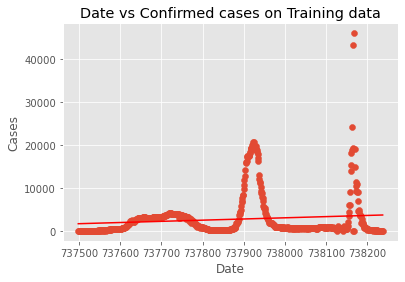

In [142]:
# Plotting the regression line
regline = regsr.coef_*X+regsr.intercept_

# Plotting on the training dataset
plt.scatter(X, Y)
plt.plot(X, regline, color='red')
plt.title('Date vs Confirmed cases on Training data')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

In [143]:
Y_pred = regsr.predict(X_test)

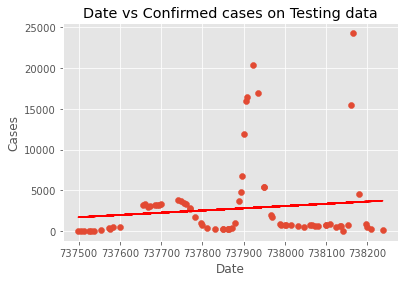

In [144]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.title('Date vs Confirmed cases on Testing data')  
plt.xlabel('Date')  
plt.ylabel('Cases')   
plt.show()

In [145]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 3120.878489491834
Mean Squared Error: 24404935.464001037
Root Mean Squared Error: 4940.135166571967
R-2: 0.01914841605958162


In [146]:
pickle.dump(regsr, open('linearModel_wb', 'wb'))

# **Linear Regression for Telangana**

In [147]:
std=pd.read_csv('state_wise_daily.csv')

In [148]:
std['Confirmed']=std['TG']

In [149]:
std=std[std.Status=='Confirmed']

In [150]:
std=std.drop(columns='Status', axis=1)

In [151]:
columns=['Date','Date_YMD', 'Confirmed']

In [152]:
std=std[columns]

In [153]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,1
3,15-Mar-20,15-03-2020,2
6,16-Mar-20,16-03-2020,1
9,17-Mar-20,17-03-2020,1
12,18-Mar-20,18-03-2020,8


In [154]:
std['Date']=pd.to_datetime(std['Date'])
std['Date']=std['Date'].map(dt.datetime.toordinal)

In [155]:
X = std.iloc[:, :-2].values   # Date
Y = std.iloc[:, 2].values     # Confirmed cases

In [156]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0) 

regsr = LinearRegression()  
regsr.fit(X_train.reshape(-1,1), Y_train) 

LinearRegression()

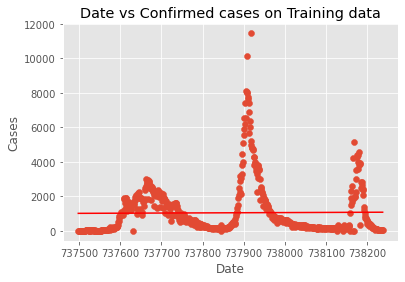

In [157]:
# Plotting the regression line
regline = regsr.coef_*X+regsr.intercept_

# Plotting on the training dataset
plt.scatter(X, Y)
plt.plot(X, regline, color='red')
plt.title('Date vs Confirmed cases on Training data')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

In [158]:
Y_pred = regsr.predict(X_test)

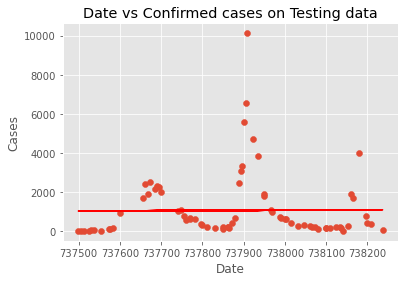

In [159]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.title('Date vs Confirmed cases on Testing data')  
plt.xlabel('Date')  
plt.ylabel('Cases')   
plt.show()

In [160]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 1118.648164849701
Mean Squared Error: 2901925.4368146695
Root Mean Squared Error: 1703.5038705018164
R-2: -0.003557248277257674


In [161]:
pickle.dump(regsr, open('linearModel_tg', 'wb'))

# **Linear Regression for AP**

In [162]:
std=pd.read_csv('state_wise_daily.csv')

In [163]:
std['Confirmed']=std['AP']

In [164]:
std=std[std.Status=='Confirmed']

In [165]:
std=std.drop(columns='Status', axis=1)

In [166]:
columns=['Date','Date_YMD', 'Confirmed']

In [167]:
std=std[columns]

In [168]:
std.tail()

,Date,Date_YMD,Confirmed
2208,20-Mar-22,03-20-2022,49
2211,21-Mar-22,03-21-2022,37
2214,22-Mar-22,03-22-2022,30
2217,23-Mar-22,03-23-2022,31
2220,24-Mar-22,03-24-2022,39


In [169]:
std['Date']=pd.to_datetime(std['Date'])
std['Date']=std['Date'].map(dt.datetime.toordinal)

In [170]:
X = std.iloc[:, :-2].values   # Date
Y = std.iloc[:, 2].values     # Confirmed cases

In [171]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0) 

regsr = LinearRegression()  
regsr.fit(X_train.reshape(-1,1), Y_train) 

LinearRegression()

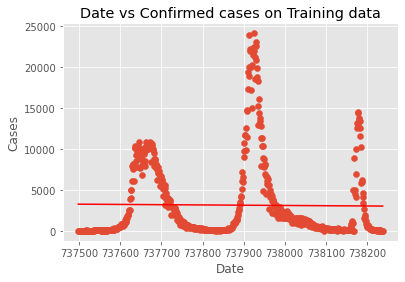

In [172]:
# Plotting the regression line
regline = regsr.coef_*X+regsr.intercept_

# Plotting on the training dataset
plt.scatter(X, Y)
plt.plot(X, regline, color='red')
plt.title('Date vs Confirmed cases on Training data')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

In [173]:
Y_pred = regsr.predict(X_test)

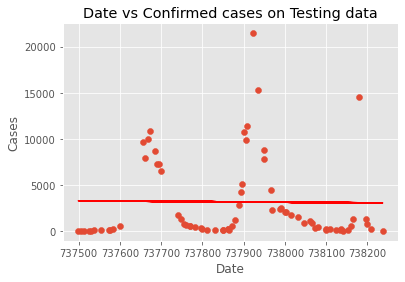

In [174]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.title('Date vs Confirmed cases on Testing data')  
plt.xlabel('Date')  
plt.ylabel('Cases')   
plt.show()

In [175]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 3488.2722147332343
Mean Squared Error: 19604821.428712174
Root Mean Squared Error: 4427.733215620852
R-2: -0.0023964087189978223


In [176]:
pickle.dump(regsr, open('linearModel_ap', 'wb'))

# **Linear Regression for KERALA**

In [177]:
std=pd.read_csv('state_wise_daily.csv')

In [178]:
std['Confirmed']=std['KL']

In [179]:
std=std[std.Status=='Confirmed']

In [180]:
std=std.drop(columns='Status', axis=1)

In [181]:
columns=['Date','Date_YMD', 'Confirmed']

In [182]:
std=std[columns]

In [183]:
std.tail()

,Date,Date_YMD,Confirmed
2208,20-Mar-22,03-20-2022,596
2211,21-Mar-22,03-21-2022,495
2214,22-Mar-22,03-22-2022,702
2217,23-Mar-22,03-23-2022,702
2220,24-Mar-22,03-24-2022,558


In [184]:
std['Date']=pd.to_datetime(std['Date'])
std['Date']=std['Date'].map(dt.datetime.toordinal)

In [185]:
X = std.iloc[:, :-2].values   # Date
Y = std.iloc[:, 2].values     # Confirmed cases

In [186]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0) 

regsr = LinearRegression()  
regsr.fit(X_train.reshape(-1,1), Y_train) 

LinearRegression()

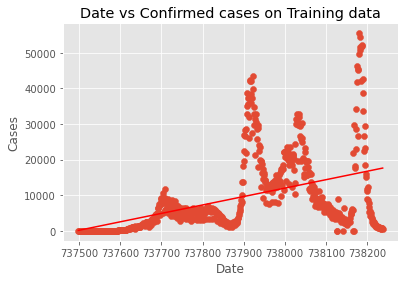

In [187]:
# Plotting the regression line
regline = regsr.coef_*X+regsr.intercept_

# Plotting on the training dataset
plt.scatter(X, Y)
plt.plot(X, regline, color='red')
plt.title('Date vs Confirmed cases on Training data')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

In [188]:
Y_pred = regsr.predict(X_test)

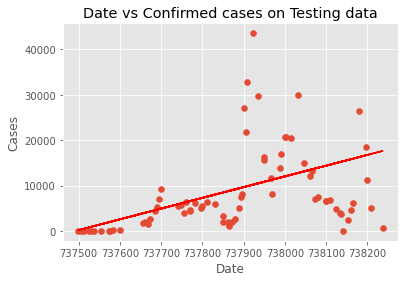

In [189]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.title('Date vs Confirmed cases on Testing data')  
plt.xlabel('Date')  
plt.ylabel('Cases')   
plt.show()

In [190]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 5807.371253496557
Mean Squared Error: 70925875.32510212
Root Mean Squared Error: 8421.750134330876
R-2: 0.12568658506546182


In [191]:
pickle.dump(regsr, open('linearModel_kl', 'wb'))

# **Linear Regression for KA**

In [192]:
std=pd.read_csv('state_wise_daily.csv')

In [193]:
std['Confirmed']=std['KA']

In [194]:
std=std[std.Status=='Confirmed']

In [195]:
std=std.drop(columns='Status', axis=1)

In [196]:
columns=['Date','Date_YMD', 'Confirmed']

In [197]:
std=std[columns]

In [198]:
std.tail()

,Date,Date_YMD,Confirmed
2208,20-Mar-22,03-20-2022,109
2211,21-Mar-22,03-21-2022,71
2214,22-Mar-22,03-22-2022,92
2217,23-Mar-22,03-23-2022,93
2220,24-Mar-22,03-24-2022,109


In [199]:
std['Date']=pd.to_datetime(std['Date'])
std['Date']=std['Date'].map(dt.datetime.toordinal)

In [200]:
X = std.iloc[:, :-2].values   # Date
Y = std.iloc[:, 2].values     # Confirmed cases

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0) 

regsr = LinearRegression()  
regsr.fit(X_train.reshape(-1,1), Y_train) 

LinearRegression()

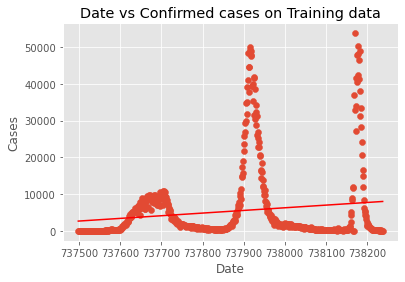

In [202]:
# Plotting the regression line
regline = regsr.coef_*X+regsr.intercept_

# Plotting on the training dataset
plt.scatter(X, Y)
plt.plot(X, regline, color='red')
plt.title('Date vs Confirmed cases on Training data')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

In [203]:
Y_pred = regsr.predict(X_test)

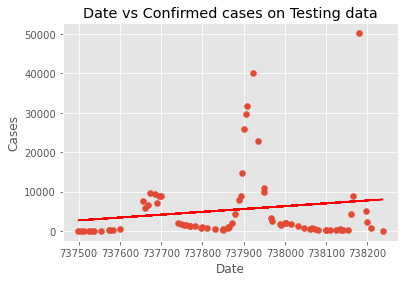

In [204]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.title('Date vs Confirmed cases on Testing data')  
plt.xlabel('Date')  
plt.ylabel('Cases')   
plt.show()

In [205]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 6216.4139976758015
Mean Squared Error: 86353496.35900395
Root Mean Squared Error: 9292.658196608974
R-2: 0.012156050478651315


In [206]:
pickle.dump(regsr, open('linearModel_ka', 'wb'))

# **Linear Regression for DL**

In [207]:
std=pd.read_csv('state_wise_daily.csv')

In [208]:
std['Confirmed']=std['DL']

In [209]:
std=std[std.Status=='Confirmed']

In [210]:
std=std.drop(columns='Status', axis=1)

In [211]:
columns=['Date','Date_YMD', 'Confirmed']

In [212]:
std=std[columns]

In [213]:
std.tail()

,Date,Date_YMD,Confirmed
2208,20-Mar-22,03-20-2022,97
2211,21-Mar-22,03-21-2022,108
2214,22-Mar-22,03-22-2022,104
2217,23-Mar-22,03-23-2022,132
2220,24-Mar-22,03-24-2022,111


In [214]:
std['Date']=pd.to_datetime(std['Date'])
std['Date']=std['Date'].map(dt.datetime.toordinal)

In [215]:
X = std.iloc[:, :-2].values   # Date
Y = std.iloc[:, 2].values     # Confirmed cases

In [216]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0) 

regsr = LinearRegression()  
regsr.fit(X_train.reshape(-1,1), Y_train) 

LinearRegression()

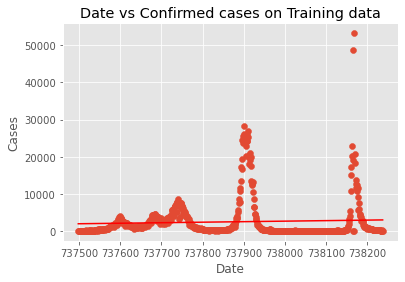

In [217]:
# Plotting the regression line
regline = regsr.coef_*X+regsr.intercept_

# Plotting on the training dataset
plt.scatter(X, Y)
plt.plot(X, regline, color='red')
plt.title('Date vs Confirmed cases on Training data')  
plt.xlabel('Date')  
plt.ylabel('Cases')  
plt.show()

In [218]:
Y_pred = regsr.predict(X_test)

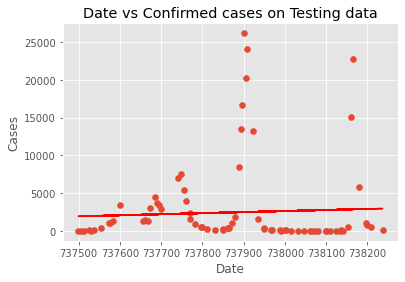

In [219]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.title('Date vs Confirmed cases on Testing data')  
plt.xlabel('Date')  
plt.ylabel('Cases')   
plt.show()

In [220]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test, Y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 3651.724613707236
Mean Squared Error: 35986626.49803706
Root Mean Squared Error: 5998.885437982381
R-2: -0.008415349216396972


In [221]:
pickle.dump(regsr, open('linearModel_dl', 'wb'))

# **PolynomialRegression 3rd deg IN**

In [222]:
std=pd.read_csv('state_wise_daily.csv')

In [223]:
std['Confirmed']=std['TT']

In [224]:
std=std[std.Status=='Confirmed']

In [225]:
std=std.drop(columns='Status', axis=1)

In [226]:
columns=['Date','Date_YMD', 'Confirmed']

In [227]:
std=std[columns]

In [228]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,81.0
3,15-Mar-20,15-03-2020,27.0
6,16-Mar-20,16-03-2020,15.0
9,17-Mar-20,17-03-2020,11.0
12,18-Mar-20,18-03-2020,37.0


In [229]:
dl_list = std['Date']

In [230]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [231]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;

In [232]:
y = np.array(std["Confirmed"]).reshape(-1,1)
X = np.array(std["Days"]).reshape(-1,1)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15, shuffle=False)

In [234]:
poly_reg3 = PolynomialFeatures(degree=6)
poly_y_train = poly_reg3.fit_transform(X_train)
poly_y_test  = poly_reg3.fit_transform(X_test)
poly_y = poly_reg3.fit_transform(X)

In [235]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, y)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

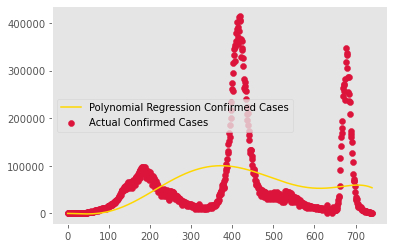

In [236]:
plt.scatter(X,
         y,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(X,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [237]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 64030.78171376695
Mean Squared Error: 4099941006.8760715


In [238]:
linear_model.predict(poly_reg3.fit_transform([[740]]))

array([[53939.19905723]])

In [239]:
pickle.dump(model1, open('in_poly','wb'))


# **PolynomialRegression 3rd deg WB**

In [240]:
std=pd.read_csv('state_wise_daily.csv')

In [241]:
std['Confirmed']=std['WB']

In [242]:
std=std[std.Status=='Confirmed']

In [243]:
std=std.drop(columns='Status', axis=1)

In [244]:
columns=['Date','Date_YMD', 'Confirmed']

In [245]:
std=std[columns]

In [246]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,0
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,0
9,17-Mar-20,17-03-2020,1
12,18-Mar-20,18-03-2020,0


In [247]:
dl_list = std['Date']

In [248]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [249]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [251]:
poly_y_train = poly_reg3.fit_transform(y_train)
poly_y_test  = poly_reg3.fit_transform(y_test)
poly_y = poly_reg3.fit_transform(y)

In [252]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

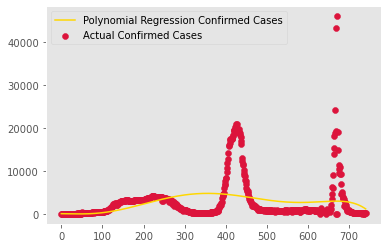

In [253]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [254]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 4669.632334813832
Mean Squared Error: 21805466.142338883


In [255]:
model1.predict(poly_reg3.fit_transform([[740]]))

array([1113.64975202])

In [256]:
pickle.dump(model1, open('wb_poly','wb'))


# **PolynomialRegression 3rd deg TG**

In [257]:
std=pd.read_csv('state_wise_daily.csv')

In [258]:
std['Confirmed']=std['TG']

In [259]:
std=std[std.Status=='Confirmed']

In [260]:
std=std.drop(columns='Status', axis=1)

In [261]:
columns=['Date','Date_YMD', 'Confirmed']

In [262]:
std=std[columns]

In [263]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,1
3,15-Mar-20,15-03-2020,2
6,16-Mar-20,16-03-2020,1
9,17-Mar-20,17-03-2020,1
12,18-Mar-20,18-03-2020,8


In [264]:
dl_list = std['Date']

In [265]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [266]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV;
from sklearn.preprocessing import StandardScaler;

In [267]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [268]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [269]:
poly_y_train = poly_reg3.fit_transform(y_train)
poly_y_test  = poly_reg3.fit_transform(y_test)
poly_y = poly_reg3.fit_transform(y)

In [270]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

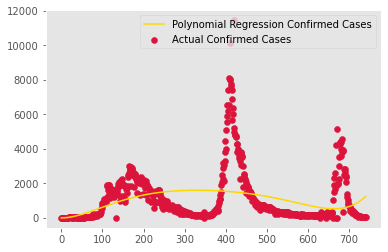

In [271]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [272]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 1402.9317386969144
Mean Squared Error: 1968217.463443147


In [273]:
model1.predict(poly_reg3.fit_transform([[740]]))

array([1245.30983165])

In [274]:
pickle.dump(model1, open('tg_poly','wb'))


# **PolynomialRegression 3rd deg AP**

In [275]:
std=pd.read_csv('state_wise_daily.csv')

In [276]:
std['Confirmed']=std['AP']

In [277]:
std=std[std.Status=='Confirmed']

In [278]:
std=std.drop(columns='Status', axis=1)

In [279]:
columns=['Date','Date_YMD', 'Confirmed']

In [280]:
std=std[columns]

In [281]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,1
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,0
9,17-Mar-20,17-03-2020,0
12,18-Mar-20,18-03-2020,0


In [282]:
dl_list = std['Date']

In [283]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [284]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [286]:
poly_y_train = poly_reg3.fit_transform(y_train)
poly_y_test  = poly_reg3.fit_transform(y_test)
poly_y = poly_reg3.fit_transform(y)

In [287]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

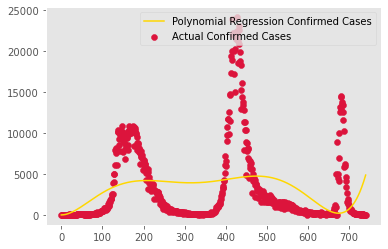

In [288]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [289]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 4603.269756399979
Mean Squared Error: 21190092.450186726


In [290]:
model1.predict(poly_reg3.fit_transform([[740]]))

array([4872.14234762])

In [291]:
pickle.dump(model1, open('ap_poly','wb'))


# **PolynomialRegression 3rd deg Delhi**

In [292]:
std=pd.read_csv('state_wise_daily.csv')

In [293]:
std['Confirmed']=std['DL']

In [294]:
std=std[std.Status=='Confirmed']

In [295]:
std=std.drop(columns='Status', axis=1)

In [296]:
columns=['Date','Date_YMD', 'Confirmed']

In [297]:
std=std[columns]

In [298]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,7
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,0
9,17-Mar-20,17-03-2020,1
12,18-Mar-20,18-03-2020,2


In [299]:
dl_list = std['Date']

In [300]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [301]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [302]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [304]:
poly_y_train = poly_reg3.fit_transform(y_train)
poly_y_test  = poly_reg3.fit_transform(y_test)
poly_y = poly_reg3.fit_transform(y)

In [305]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

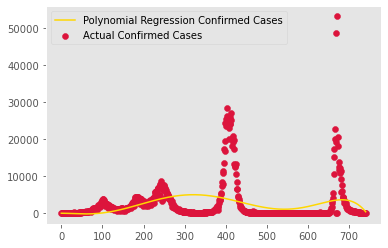

In [306]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [307]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 5205.561149518265
Mean Squared Error: 27097866.881373916


In [308]:
model1.predict(poly_reg3.fit_transform([[740]]))

array([405.44760003])

In [309]:
pickle.dump(model1, open('dl_poly','wb'))


# **PolynomialRegression 3rd deg Karnataka**

In [310]:
std=pd.read_csv('state_wise_daily.csv')

In [311]:
std['Confirmed']=std['KA']

In [312]:
std=std[std.Status=='Confirmed']

In [313]:
std=std.drop(columns='Status', axis=1)

In [314]:
columns=['Date','Date_YMD', 'Confirmed']

In [315]:
std=std[columns]

In [316]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,6
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,1
9,17-Mar-20,17-03-2020,2
12,18-Mar-20,18-03-2020,5


In [317]:
dl_list = std['Date']

In [318]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [319]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

In [320]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [321]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [322]:
poly_y_train = poly_reg3.fit_transform(y_train)
poly_y_test  = poly_reg3.fit_transform(y_test)
poly_y = poly_reg3.fit_transform(y)

In [323]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

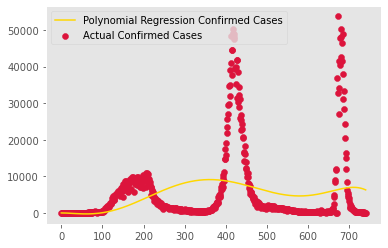

In [324]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [325]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 9716.343118217314
Mean Squared Error: 94407323.59092896


In [326]:
model1.predict(poly_reg3.fit_transform([[740]]))

array([6297.35750822])

In [327]:
pickle.dump(model1, open('ka_poly','wb'))


# **PolynomialRegression 3rd deg Kerala**

In [328]:
std=pd.read_csv('state_wise_daily.csv')

In [329]:
std['Confirmed']=std['KL']

In [330]:
std=std[std.Status=='Confirmed']

In [331]:
std=std.drop(columns='Status', axis=1)

In [332]:
columns=['Date','Date_YMD', 'Confirmed']

In [333]:
std=std[columns]

In [334]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,19
3,15-Mar-20,15-03-2020,5
6,16-Mar-20,16-03-2020,3
9,17-Mar-20,17-03-2020,0
12,18-Mar-20,18-03-2020,0


In [335]:
dl_list = std['Date']

In [336]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [337]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [339]:
poly_y_train = poly_reg3.fit_transform(y_train)
poly_y_test  = poly_reg3.fit_transform(y_test)
poly_y = poly_reg3.fit_transform(y)

In [340]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

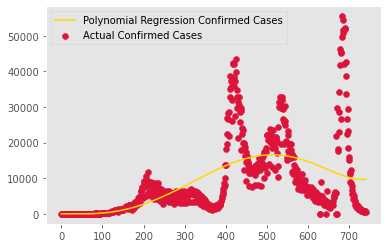

In [341]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [342]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 8784.440999548902
Mean Squared Error: 77166403.67455572


In [343]:
model1.predict(poly_reg3.fit_transform([[740]]))

array([9688.05575813])

In [344]:
pickle.dump(model1, open('kl_poly','wb'))


# **PolynomialRegression 7th deg IN**

In [345]:
std=pd.read_csv('state_wise_daily.csv')

In [346]:
std['Confirmed']=std['TT']

In [347]:
std=std[std.Status=='Confirmed']

In [348]:
std=std.drop(columns='Status', axis=1)

In [349]:
columns=['Date','Date_YMD', 'Confirmed']

In [350]:
std=std[columns]

In [351]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,81.0
3,15-Mar-20,15-03-2020,27.0
6,16-Mar-20,16-03-2020,15.0
9,17-Mar-20,17-03-2020,11.0
12,18-Mar-20,18-03-2020,37.0


In [352]:
dl_list = std['Date']

In [353]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [354]:
X = np.array(std["Confirmed"]).reshape(-1,1)
y = np.array(std["Days"]).reshape(-1,1)

In [355]:
final_degree = TuningModel().finalDegree(x=X, y=y)
final_degree = final_degree['Poly degree']


In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [357]:
poly_reg = PolynomialFeatures(degree=int(final_degree))
poly_y_train = poly_reg.fit_transform(y_train)
poly_y_test  = poly_reg.fit_transform(y_test)
poly_y = poly_reg.fit_transform(y)

In [358]:
linear_model = LinearRegression(fit_intercept=False)
linear_model.fit(poly_y_train, X_train)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

In [359]:
# plt.plot(output['Poly degree'], output['RMSE_CV'])
# plt.show()

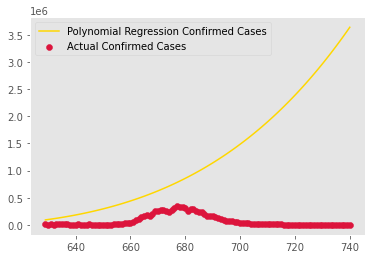

In [360]:
plt.scatter(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y_test,
          test_linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [361]:
model1.predict(poly_reg.fit_transform([[740]]))

array([9688.05575813])

In [362]:
pickle.dump(model1, open('in7_poly','wb'))


# **PolynomialRegression 7th deg WB**

In [363]:
std=pd.read_csv('state_wise_daily.csv')

In [364]:
std['Confirmed']=std['WB']

In [365]:
std=std[std.Status=='Confirmed']

In [366]:
std=std.drop(columns='Status', axis=1)

In [367]:
columns=['Date','Date_YMD', 'Confirmed']

In [368]:
std=std[columns]

In [369]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,0
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,0
9,17-Mar-20,17-03-2020,1
12,18-Mar-20,18-03-2020,0


In [370]:
dl_list = std['Date']

In [371]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [372]:
X = np.array(std["Confirmed"]).reshape(-1,1)
y = np.array(std["Days"]).reshape(-1,1)

In [373]:
final_degree = TuningModel().finalDegree(x=X, y=y)
final_degree = final_degree['Poly degree']
final_degree

0    1
Name: Poly degree, dtype: int64

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [375]:
poly_reg = PolynomialFeatures(degree=int(final_degree))
poly_y_train = poly_reg.fit_transform(y_train)
poly_y_test  = poly_reg.fit_transform(y_test)
poly_y = poly_reg.fit_transform(y)

In [376]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

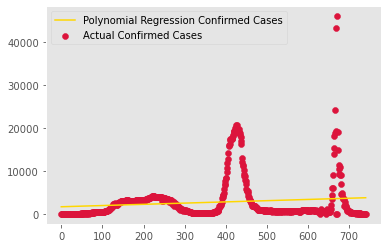

In [377]:
plt.scatter(y_test,
         X_test,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [378]:
model1.predict(poly_reg.fit_transform([[740]]))

array([[3773.90667525]])

In [379]:
pickle.dump(model1, open('wb7_poly','wb'))


# **PolynomialRegression 7th deg TG**

In [380]:
std=pd.read_csv('state_wise_daily.csv')

In [381]:
std['Confirmed']=std['TG']

In [382]:
std=std[std.Status=='Confirmed']

In [383]:
std=std.drop(columns='Status', axis=1)

In [384]:
columns=['Date','Date_YMD', 'Confirmed']

In [385]:
std=std[columns]

In [386]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,1
3,15-Mar-20,15-03-2020,2
6,16-Mar-20,16-03-2020,1
9,17-Mar-20,17-03-2020,1
12,18-Mar-20,18-03-2020,8


In [387]:
dl_list = std['Date']

In [388]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [389]:
X = np.array(std["Confirmed"]).reshape(-1,1)
y = np.array(std["Days"]).reshape(-1,1)

In [390]:
final_degree = TuningModel().finalDegree(x=X, y=y)
final_degree = final_degree['Poly degree']
final_degree

0    1
Name: Poly degree, dtype: int64

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [392]:
poly_reg = PolynomialFeatures(degree=int(final_degree))
poly_y_train = poly_reg.fit_transform(y_train)
poly_y_test  = poly_reg.fit_transform(y_test)
poly_y = poly_reg.fit_transform(y)

In [393]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

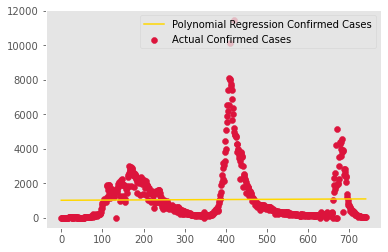

In [394]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [395]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 1463.135085625186
Mean Squared Error: 2140764.2787874206


In [396]:
model1.predict(poly_reg.fit_transform([[740]]))

array([[1100.83236757]])

In [397]:
pickle.dump(model1, open('tg7_poly','wb'))


# **PolynomialRegression 7th deg AP**

In [398]:
std=pd.read_csv('state_wise_daily.csv')

In [399]:
std['Confirmed']=std['AP']

In [400]:
std=std[std.Status=='Confirmed']

In [401]:
std=std.drop(columns='Status', axis=1)

In [402]:
columns=['Date','Date_YMD', 'Confirmed']

In [403]:
std=std[columns]

In [404]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,1
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,0
9,17-Mar-20,17-03-2020,0
12,18-Mar-20,18-03-2020,0


In [405]:
dl_list = std['Date']

In [406]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [407]:
X = np.array(std["Confirmed"]).reshape(-1,1)
y = np.array(std["Days"]).reshape(-1,1)

In [408]:
final_degree = TuningModel().finalDegree(x=X, y=y)
final_degree = final_degree['Poly degree']
final_degree

9    10
Name: Poly degree, dtype: int64

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [410]:
poly_reg = PolynomialFeatures(degree=int(final_degree))
poly_y_train = poly_reg.fit_transform(y_train)
poly_y_test  = poly_reg.fit_transform(y_test)
poly_y = poly_reg.fit_transform(y)

In [411]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

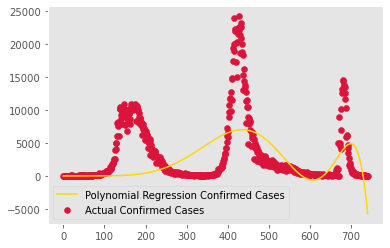

In [412]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [413]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 4616.367898507029
Mean Squared Error: 21310852.5743662


In [414]:
model1.predict(poly_reg.fit_transform([[740]]))

array([[-5753.42621338]])

In [415]:
pickle.dump(model1, open('ap7_poly','wb'))


# **PolynomialRegression 7th deg Delhi**

In [416]:
std=pd.read_csv('state_wise_daily.csv')

In [417]:
std['Confirmed']=std['DL']

In [418]:
std=std[std.Status=='Confirmed']

In [419]:
std=std.drop(columns='Status', axis=1)

In [420]:
columns=['Date','Date_YMD', 'Confirmed']

In [421]:
std=std[columns]

In [422]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,7
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,0
9,17-Mar-20,17-03-2020,1
12,18-Mar-20,18-03-2020,2


In [423]:
dl_list = std['Date']

In [424]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [425]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [427]:
poly_y_train = poly_reg.fit_transform(y_train)
poly_y_test  = poly_reg.fit_transform(y_test)
poly_y = poly_reg.fit_transform(y)

In [428]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

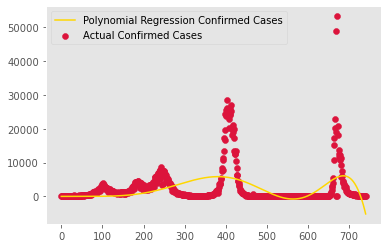

In [429]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [430]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 5016.404515551641
Mean Squared Error: 25164314.263646897


In [431]:
model1.predict(poly_reg.fit_transform([[740]]))

array([-5179.90104899])

In [432]:
pickle.dump(model1, open('dl7_poly','wb'))


# **PolynomialRegression 7th deg KERELA**

In [433]:
std=pd.read_csv('state_wise_daily.csv')

In [434]:
std['Confirmed']=std['KL']

In [435]:
std=std[std.Status=='Confirmed']

In [436]:
std=std.drop(columns='Status', axis=1)

In [437]:
columns=['Date','Date_YMD', 'Confirmed']

In [438]:
std=std[columns]

In [439]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,19
3,15-Mar-20,15-03-2020,5
6,16-Mar-20,16-03-2020,3
9,17-Mar-20,17-03-2020,0
12,18-Mar-20,18-03-2020,0


In [440]:
dl_list = std['Date']

In [441]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [442]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [443]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [444]:
poly_y_train = poly_reg.fit_transform(y_train)
poly_y_test  = poly_reg.fit_transform(y_test)
poly_y = poly_reg.fit_transform(y)

In [445]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

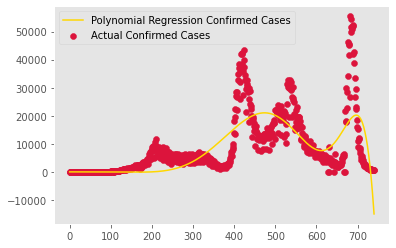

In [446]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [447]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 7833.526612530736
Mean Squared Error: 61364139.18922727


In [448]:
model1.predict(poly_reg.fit_transform([[740]]))

array([-14984.01253545])

In [449]:
pickle.dump(model1, open('kl7_poly','wb'))


# **PolynomialRegression 7th deg karnataka**

In [450]:
std=pd.read_csv('state_wise_daily.csv')

In [451]:
std['Confirmed']=std['KA']

In [452]:
std=std[std.Status=='Confirmed']

In [453]:
std=std.drop(columns='Status', axis=1)

In [454]:
columns=['Date','Date_YMD', 'Confirmed']

In [455]:
std=std[columns]

In [456]:
std.head()

,Date,Date_YMD,Confirmed
0,14-Mar-20,14-03-2020,6
3,15-Mar-20,15-03-2020,0
6,16-Mar-20,16-03-2020,1
9,17-Mar-20,17-03-2020,2
12,18-Mar-20,18-03-2020,5


In [457]:
dl_list = std['Date']

In [458]:
days_since_lst = []
for i in range(len(dl_list)):
    days_since_lst.append(i)
std["Days"] = days_since_lst
std = std[["Days", "Date", "Date_YMD", "Confirmed"]]

In [459]:
X = np.array(std["Confirmed"])
y = np.array(std["Days"]).reshape(-1,1)

In [460]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.15,shuffle = False)

In [461]:
poly_y_train = poly_reg.fit_transform(y_train)
poly_y_test  = poly_reg.fit_transform(y_test)
poly_y = poly_reg.fit_transform(y)

In [462]:
linear_model = LinearRegression(fit_intercept=False)
model1 = linear_model.fit(poly_y, X)
test_linear_pred = linear_model.predict(poly_y_test)
linear_pred = linear_model.predict(poly_y)

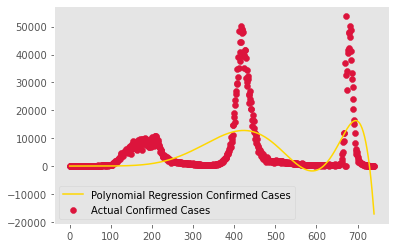

In [463]:
plt.scatter(y,
         X,
         label = "Actual Confirmed Cases",
         color = 'crimson')
plt.plot(y,
          linear_pred,
         label = "Polynomial Regression Confirmed Cases",
         color = 'gold')
plt.grid()
plt.legend()
plt.show()


In [464]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(X,linear_pred)))
print('Mean Squared Error:', metrics.mean_squared_error(X, linear_pred))

Root Mean Squared Error: 8771.295918357937
Mean Squared Error: 76935632.0874026


In [465]:
model1.predict(poly_reg.fit_transform([[740]]))

array([-17163.8572294])

In [466]:
pickle.dump(model1, open('ka7_poly','wb'))


# **prediction Model**

In [467]:
#################################
#                               #
#  Generating Future dates      #
#                               #
#################################

import pandas as pd

class Dates:

    __existMonths = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
    __existDays = ["31", "28", "31", "30", "31", "30", "31", "31", "30", "31", "30", "31"] 

    def __init__(self, num, startDate) -> None:
        self.num = num
        self.startDate = startDate

    def __dateParser(self):

        startDate = list(self.startDate)
        year = "".join(startDate[:4])
        month = "".join(startDate[5:7])
        day = "".join(startDate[8:10])
        # print(f"{year}-{month}-{day}")

        #temp
        mnth = month
        yea = year 
        dat = day

        
        mm = int(mnth)
        yy = int(yea)
        dd = int(dat)


        resultDates = []


        for i in range(self.num):
            
            if mnth in Dates.__existMonths:
                if dat == Dates.__existDays[mm-1]:
                    newDate = f"{yea}-{mnth}-{dat}"
                   
                    resultDates.append(newDate)

                    if mnth[0]=="0":
                        
                        mm+=1

                        if mm<10:
                            mnth = f"0{mm}"
                            
                        else:
                            mnth = f"{mm}"
                    else:
                        mm+=1
                        if mm>12:
                            mm = 1
                            mnth = f"0{mm}"
                            yy+=1
                            yea = f"{yy}"
                        else:
                            mnth = f"{mm}"              
                    dat = f"0{1}"
                    
                    
                elif dat != Dates.__existDays[mm-1]:
                    newDate = f"{yea}-{mnth}-{dat}"
                   
                    resultDates.append(newDate)
                    if dat[0]=="0":
                        dd = int(dat)
                        dd+=1  
                        if dd<10:
                            dat = f"0{dd}"      
                        else:
                            dat = f"{dd}"        
                    else:
                        dd = int(dat)
                        dd+=1
                        dat = f"{dd}"
                        
        #write_file("output.csv", resultDates)          
              
        return resultDates
        

    def futureDates(self):
        values = self.__dateParser()
        df = pd.DataFrame(values)
        df.columns=['ds']
        return df


In [468]:
#####################################
#                                   #
#    Prediction Model               #
#                                   # 
#####################################  

from cProfile import label
from cmath import e
import pickle
from tempfile import tempdir
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce



class Model:

    __modelName = 'india_model'
    __categoryName = 'TT'
    __liModelName = 'linearModel_in'
    __polyModelName='in_poly'
    __poly13ModelName='in7_poly'

    def __init__(self, n, date, df, m) -> None:
        self.n = n
        self.date = date
        self.df = df
        self.m = m


    def polynomialInputParsing(self):
          df = pd.read_csv('state_wise_daily.csv',parse_dates=['Date','Date_YMD'])
          df['Confirmed']=df['TT']
          df=df[df.Status=='Confirmed']
          df=df.drop(columns='Status', axis=1)
          columns=['Date','Date_YMD', 'Confirmed']
          df = df[columns]
          dl_list=df['Date']
          days_since_lst = []
          for i in range(len(dl_list)):
              days_since_lst.append(i)
          df["Days"] = days_since_lst
          df = df[["Days", "Date", "Date_YMD", "Confirmed"]]

          dates = Dates(self.n, self.date)
          val = dates.futureDates()
          val['ds'] = val['ds'].astype('datetime64')

          results = pd.merge(val, 
                    df[['Days','Date', 'Confirmed']],
                    left_on='ds',
                    right_on='Date',
                    how='left')

          final = []
          if str(results['Days'].values[0]).lower()=='nan':
            last = df['Days'].values[len(df)-1]
            last_date = df['Date'].values[len(df)-1]
            first_date = val['ds'].values[0]

            diff = first_date - last_date

            x = diff
            days = x.astype('timedelta64[D]')
            days = days / np.timedelta64(1, 'D')
            for j in range(int(days)):
              final.append(int(last+days+j))
          else:
            first = results['Days'].iloc[0]
            for i in range(n):
              final.append(int(first+i))
          
          return final


    def predictions(self):
        dates = Dates(self.n, self.date)
        val = dates.futureDates()
        print(Model.__modelName)
        with open(Model.__modelName,'rb') as f:
            model = pickle.load(f)
        try:
            output = model.predict(val)
        except e:
            print(e)
        return output[['ds','yhat']]


    def linearModel(self):
        dates = Dates(self.n, self.date)
        val = dates.futureDates()
        val = list(val['ds'])
        output=[]
        print(Model.__liModelName)
        with open(Model.__liModelName,'rb') as f:
            li_model = pickle.load(f)
            for i in range(self.n):
                try:
                    dte=dt.datetime.strptime(val[i], '%Y-%M-%d').toordinal()
                    out = li_model.predict([[dte]])
                    output.append(out)

                except:
                    print('hello')
        return pd.DataFrame(output, columns=['Linear Regression'])

   
    def polynomialModel(self):
        val = self.polynomialInputParsing()
        output1=[]
        with open(Model.__polyModelName,'rb') as f:
            poly_model = pickle.load(f)
            for i in range(self.n):
                try:
                    cases = poly_model.predict(poly_reg3.fit_transform([[val[i]]]))
                    output1.append(cases[0])
                except:
                    print('error')
        return pd.DataFrame(output1, columns=['3rd Polynomial Regression'])
    def polynomialModel13(self):
            
            val = self.polynomialInputParsing()
            output1=[]
            with open(Model.__poly13ModelName,'rb') as f:
                poly_model = pickle.load(f)
                for i in range(self.n):
                    try:
                        cases = poly_model.predict(poly_reg.fit_transform([[val[i]]]))
                        output1.append(cases[0])
                    except:
                        print('error')
            return pd.DataFrame(output1, columns=['7th Polynomial Regression'])

    def data_extraction(self, df):

        dates = Dates(self.n, self.date)
        val = dates.futureDates()
        val['ds'] = val['ds'].astype('datetime64')
        pivot = pd.pivot_table(df,values=Model.__categoryName,index='Date',columns='Status').sort_values(by='Date') #seperating of relevant features
        finalData = pd.DataFrame(pivot)
        finalData.reset_index(inplace=True)   
        

        #val and finalData df1 and df2
        results = pd.merge(val, 
                  finalData[['Date', 'Confirmed']],
                  left_on='ds',
                  right_on='Date',
                  how='left')

        return results


    def graph(self):

        # le = self.polynomialInputParsing()
        preds = self.predictions()
        preds = pd.DataFrame(preds)
        linear_model = self.linearModel()
        poly_model = self.polynomialModel()
        poly_model13 = self.polynomialModel13()
        extracts = self.data_extraction(self.df)
        finalData = pd.merge(preds, extracts[['ds', 'Confirmed']],
                             left_on = 'ds',
                             right_on='ds',
                             how='left')
        finalData = pd.concat([finalData, linear_model], axis=1)
        finalData = pd.concat([finalData, poly_model], axis=1)
        finalData = pd.concat([finalData, poly_model13], axis=1)
        finalData.rename(columns = {'Confirmed':'Actual Cases', 'yhat':'Prophet Forecast'}, inplace = True)
        
        #Plotting the graph of the confirmed cases of west bengal state from the dataset
        # With respect to the date 
        finalData.iplot(kind='scatter',x='ds',y=['Prophet Forecast','Actual Cases','Linear Regression','3rd Polynomial Regression','7th Polynomial Regression'],xTitle='Months',yTitle='Count of Cases',title='CONFIRMED') #Confirmed cases visualization
        
    
    def switch(self):
        try:
            if self.m==1:
                Model.__modelName = 'india_model'
                Model.__liModelName = 'linearModel_in'
                Model.__polyModelName='in_poly'
                Model.__poly13ModelName='in7_poly'
                Model.__categoryName = 'TT'
                self.graph()
            elif self.m==2:
                Model.__modelName = 'wb_model'
                Model.__liModelName = 'linearModel_wb'
                Model.__polyModelName='wb_poly'
                Model.__poly13ModelName='wb7_poly'
                Model.__categoryName = 'WB'
                self.graph()
            elif self.m==3:
                Model.__modelName = 'tg_model'
                Model.__liModelName = 'linearModel_tg'
                Model.__polyModelName='tg_poly'
                Model.__poly13ModelName='tg7_poly'
                Model.__categoryName = 'TG'
                self.graph()
            elif self.m==4:
                Model.__modelName = 'ap_model'
                Model.__liModelName = 'linearModel_ap'
                Model.__polyModelName='ap_poly'
                Model.__poly13ModelName='ap7_poly'
                Model.__categoryName = 'AP'
                self.graph()
            elif self.m==5:
                Model.__modelName = 'dl_model'
                Model.__liModelName = 'linearModel_dl'
                Model.__polyModelName='dl_poly'
                Model.__poly13ModelName='dl7_poly'
                Model.__categoryName = 'DL'
                self.graph()
            elif self.m==6:
                Model.__modelName = 'kl_model'
                Model.__liModelName = 'linearModel_kl'
                Model.__polyModelName='kl_poly'
                Model.__poly13ModelName='kl7_poly'
                Model.__categoryName = 'KL'
                self.graph()
            elif self.m==7:
                Model.__modelName = 'ka_model'
                Model.__liModelName = 'linearModel_ka'
                Model.__polyModelName='ka_poly'
                Model.__poly13ModelName='ka7_poly'
                Model.__categoryName = 'KA'
                self.graph()
        except e:
            print(e)

# below code is for Model Class
print('1 for predicting India Cases\n')
print('2 for predicting WestBengal Cases\n')
print('3 for predicting Telangana Cases\n')
print('4 for predicting Andhra pradesh Cases\n')
print('5 for predicting Delhi Cases\n')
print('6 for predicting kerala Cases\n')
print('7 for predicting Karnataka Cases\n')
m = int(input())
n = int(input("Enter the numner of days to predict\n"))
date = input("Enter the Starting date in the given format YYYY-MM-DD\n")
df = pd.read_csv('state_wise_daily.csv',parse_dates=['Date','Date_YMD'])
model = Model(n, date, df, m)
model.switch()



1 for predicting India Cases

2 for predicting WestBengal Cases

3 for predicting Telangana Cases

4 for predicting Andhra pradesh Cases

5 for predicting Delhi Cases

6 for predicting kerala Cases

7 for predicting Karnataka Cases



KeyboardInterrupt: Interrupted by user